# Customer Churn Prediction - Telecommunication industry

# Import the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import warnings
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# read the data using pandas library

In [2]:
telecom_data=pd.read_csv("customer_churn_Telecom_data.csv")

In [3]:
telecom_data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


# finding the basic summary by looking at top few records

In [4]:
telecom_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# finding the basic summary by looking at bottom few records

In [5]:
telecom_data.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


# finding the dimensions of the data sets

In [6]:
telecom_data.shape

(440833, 12)

# finding different features in the data set as indexes

In [7]:
telecom_data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

# finding different features in the data set as values

In [8]:
telecom_data.columns.values

array(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype=object)

# know the each feature of their type of data

In [9]:
telecom_data.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

Find the different statistical responses from the data set

In [10]:
telecom_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# visualize the no.of customers who churn or not churn

Text(0.5, 1.02, 'Count of target variable per category')

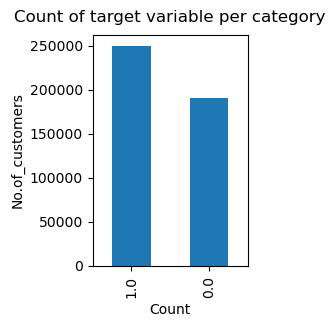

In [11]:
telecom_data['Churn'].value_counts().plot(kind='bar',figsize=(2,3))
plt.xlabel("Count")
plt.ylabel("No.of_customers")
plt.title("Count of target variable per category", y=1.02)


# finding the percentage of customers who churn or not

In [12]:
telecom_data['Churn'].value_counts()/len(telecom_data['Churn'])*100

1.0    56.710591
0.0    43.289182
Name: Churn, dtype: float64

# finding the no.of customers who looks for churn or not  

In [13]:
telecom_data['Churn'].value_counts()

1.0    249999
0.0    190833
Name: Churn, dtype: int64

In [14]:
telecom_data['Gender'].value_counts()/len(telecom_data['Gender'])

Male      0.567680
Female    0.432318
Name: Gender, dtype: float64

Text(0.5, 1.02, 'Count of male and female customers')

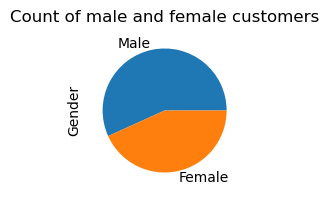

In [15]:
telecom_data['Gender'].value_counts().plot(kind='pie',figsize=(2,3))
plt.title("Count of male and female customers", y=1.02)

In [16]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


# finding the total null values present in the data set of each feature wise

In [17]:
telecom_data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

# plotting the missing values per each feature

In [18]:
missing=pd.DataFrame((telecom_data.isnull().sum())*100/telecom_data.shape[0]).reset_index()

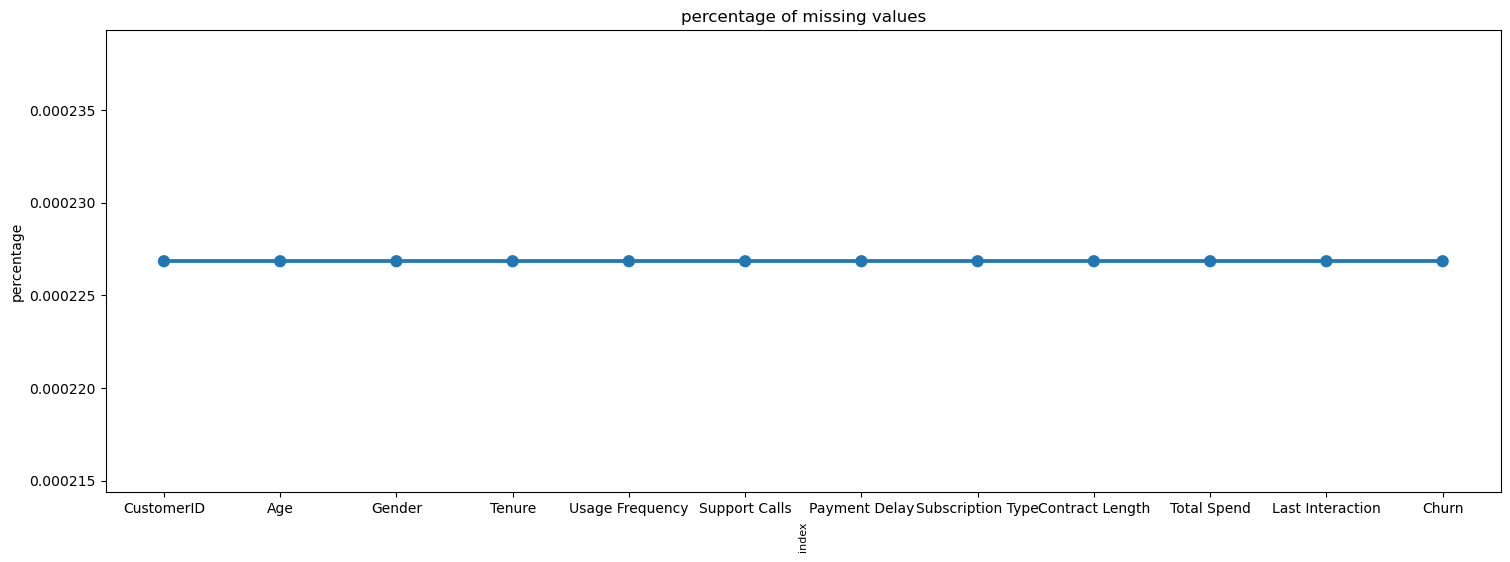

In [19]:
plt.figure(figsize=(18,6))
ax=sns.pointplot(x='index',y=0, data=missing)
plt.xlabel("index",rotation=90,fontsize=8)
plt.title("percentage of missing values")
plt.ylabel("percentage")
plt.show()

In [20]:
telecom_data2=telecom_data.copy()

In [21]:
#telecom_data2=pd.to_numeric(telecom_data2."any if you want to change", errors='coerce')
#telecom_data2.isnull().sum()

In [22]:
telecom_data2.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

# finding the which record has the null values

In [23]:
telecom_data2.loc[telecom_data["Age"].isnull()==True]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# removing the null valued records since it has much lesser in percentage of missing values so it won't much effect in model preparation

In [24]:
telecom_data2.dropna(how='any',inplace=True)

In [25]:
telecom_data2.shape

(440832, 12)

In [26]:
telecom_data2['Tenure'].max()

60.0

# grouping the different tenures

In [27]:
labels=["{0}-{1}".format(i,i+11) for i in range(1,60,12)]
telecom_data2['tenure_group']=pd.cut(telecom_data2.Tenure,range(1,62,12),right=False,labels=labels)

In [28]:
telecom_data2['tenure_group'].value_counts().sort_values(ascending=False)

49-60    92331
37-48    91932
25-36    91473
1-12     85129
13-24    79967
Name: tenure_group, dtype: int64

In [29]:
tenure_group_counts = telecom_data2['tenure_group'].value_counts().sort_index(ascending=True)

In [30]:
tenure_group_counts 

1-12     85129
13-24    79967
25-36    91473
37-48    91932
49-60    92331
Name: tenure_group, dtype: int64

# removing the unwanted features since those features will not have any impact on preparing the model

In [31]:
telecom_data2.drop(columns=['CustomerID','Tenure'],axis=1,inplace=True)

In [32]:
telecom_data2

,Age,Gender,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group
0,30.0,Female,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0,37-48
1,65.0,Female,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0,49-60
2,55.0,Female,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0,13-24
3,58.0,Male,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0,37-48
4,23.0,Male,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0,25-36
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0,49-60
440829,25.0,Female,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0,1-12
440830,26.0,Male,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0,25-36
440831,28.0,Male,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0,49-60


After removing the unnecessary features the features as remaining as below

In [33]:
telecom_data2.columns

Index(['Age', 'Gender', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn', 'tenure_group'],
      dtype='object')

# Visualizing the customer churn w.r.o different features as in the data set

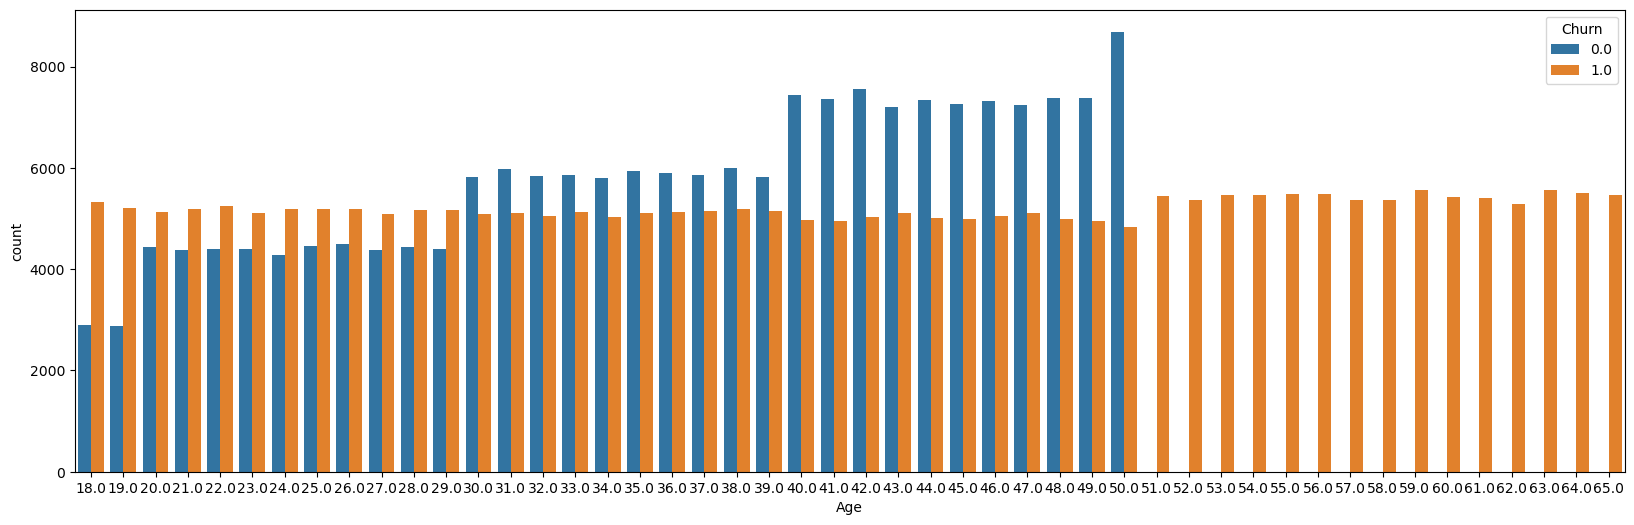

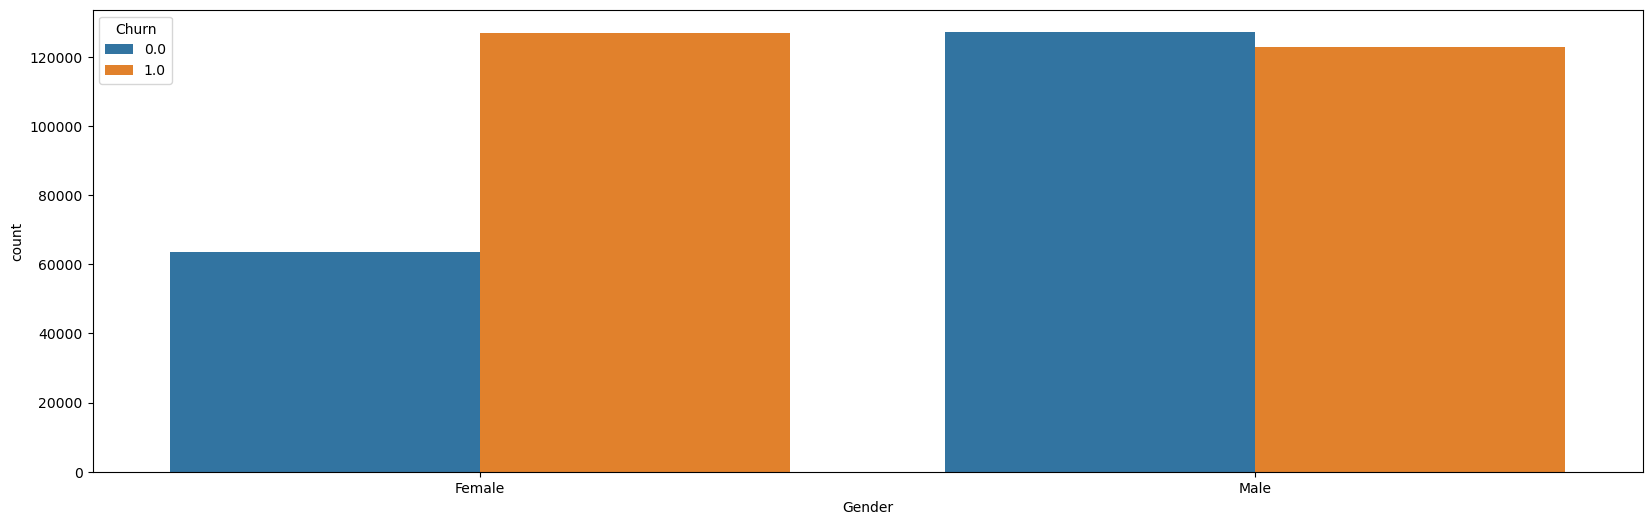

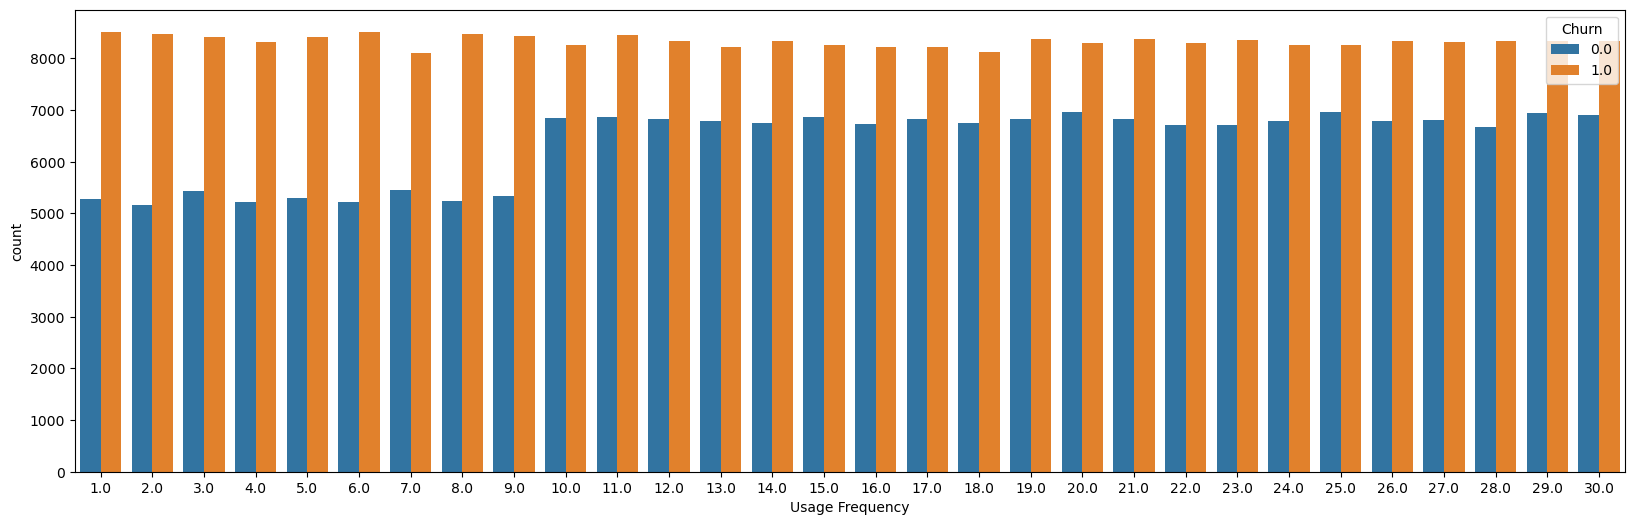

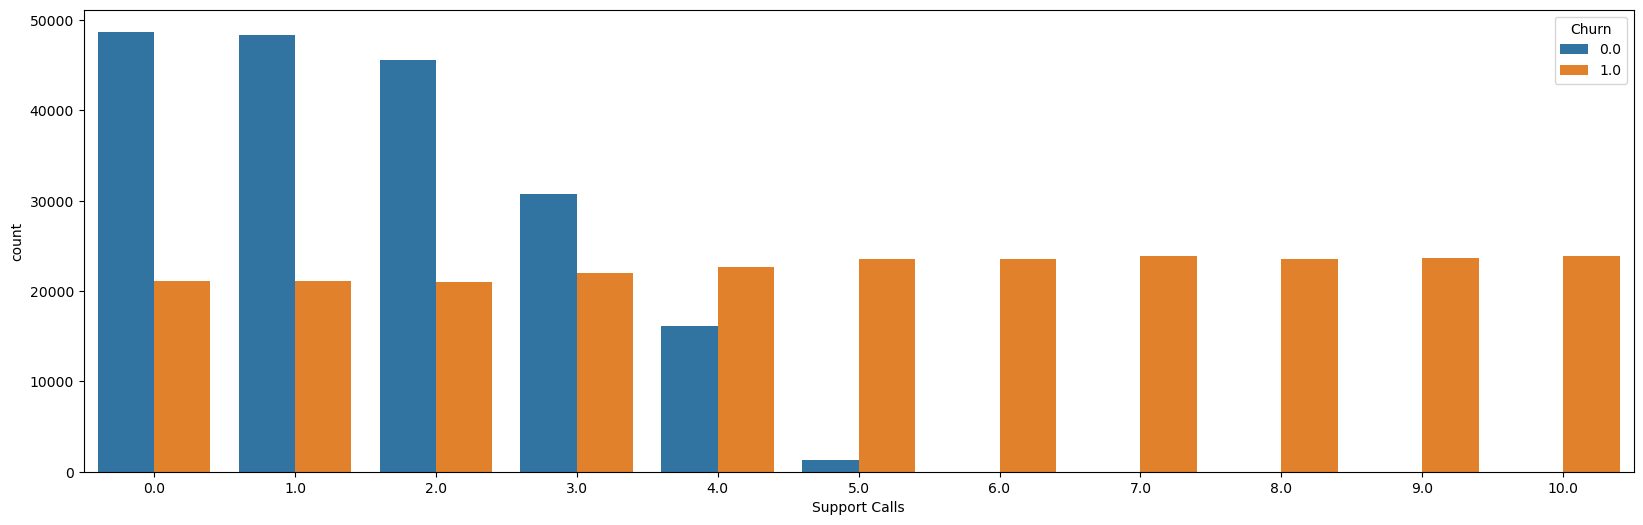

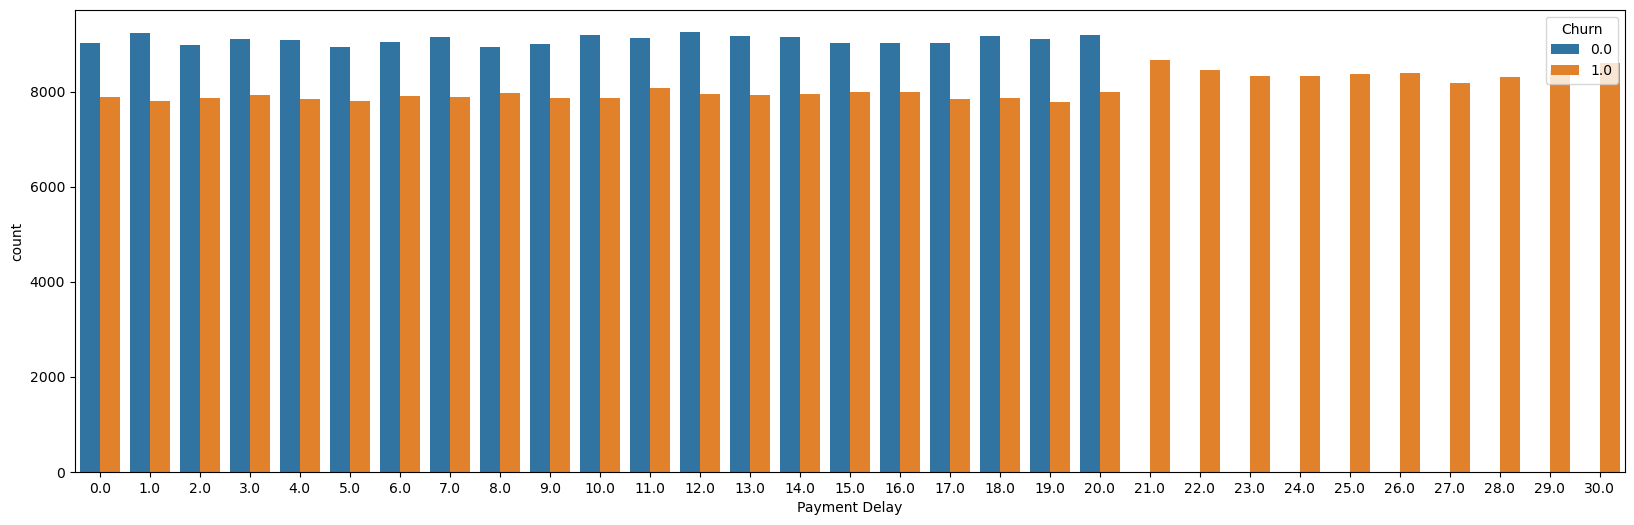

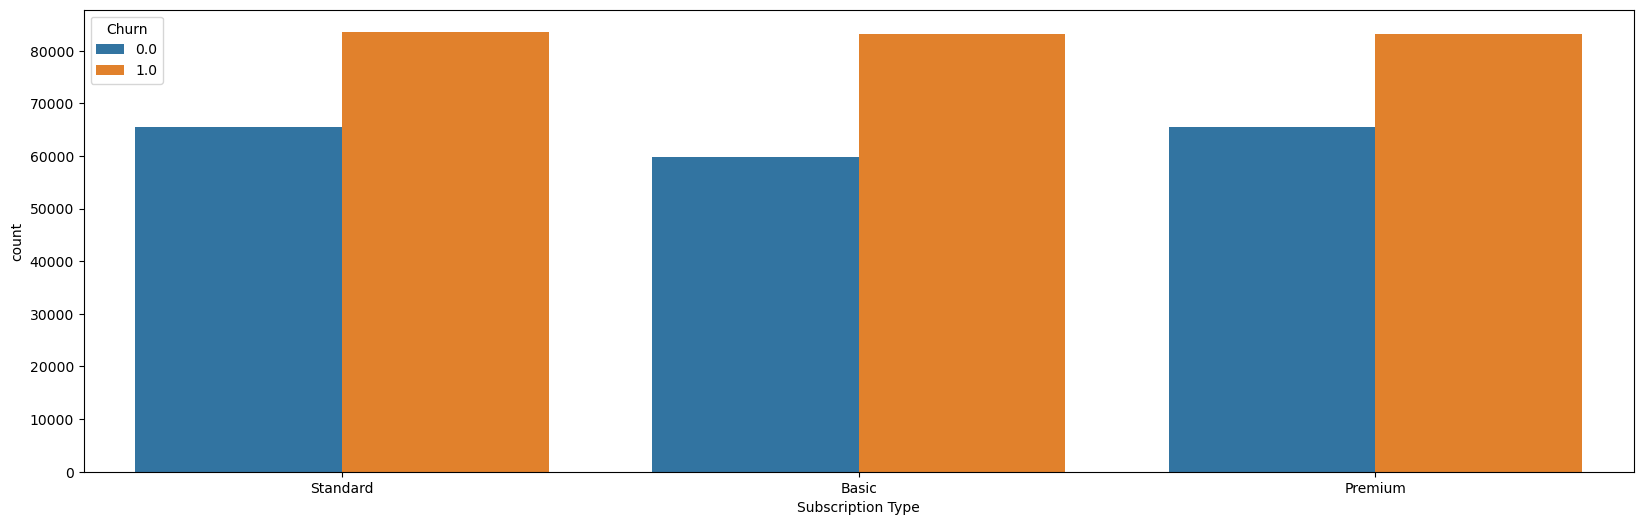

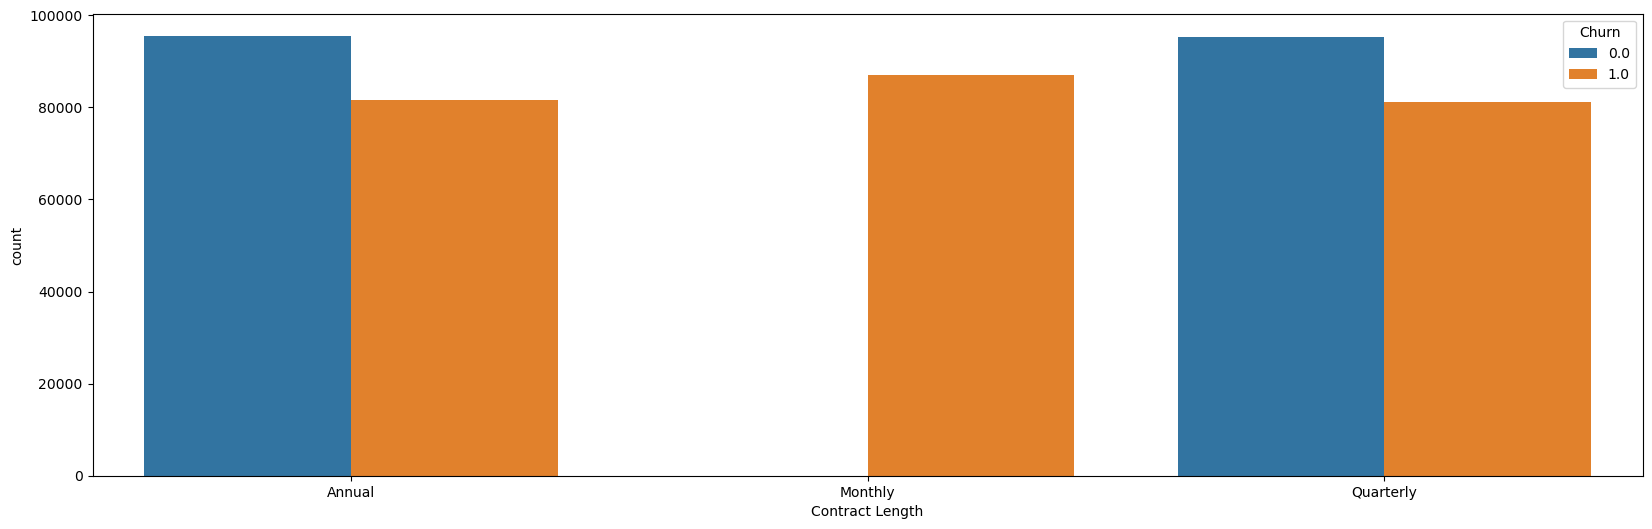

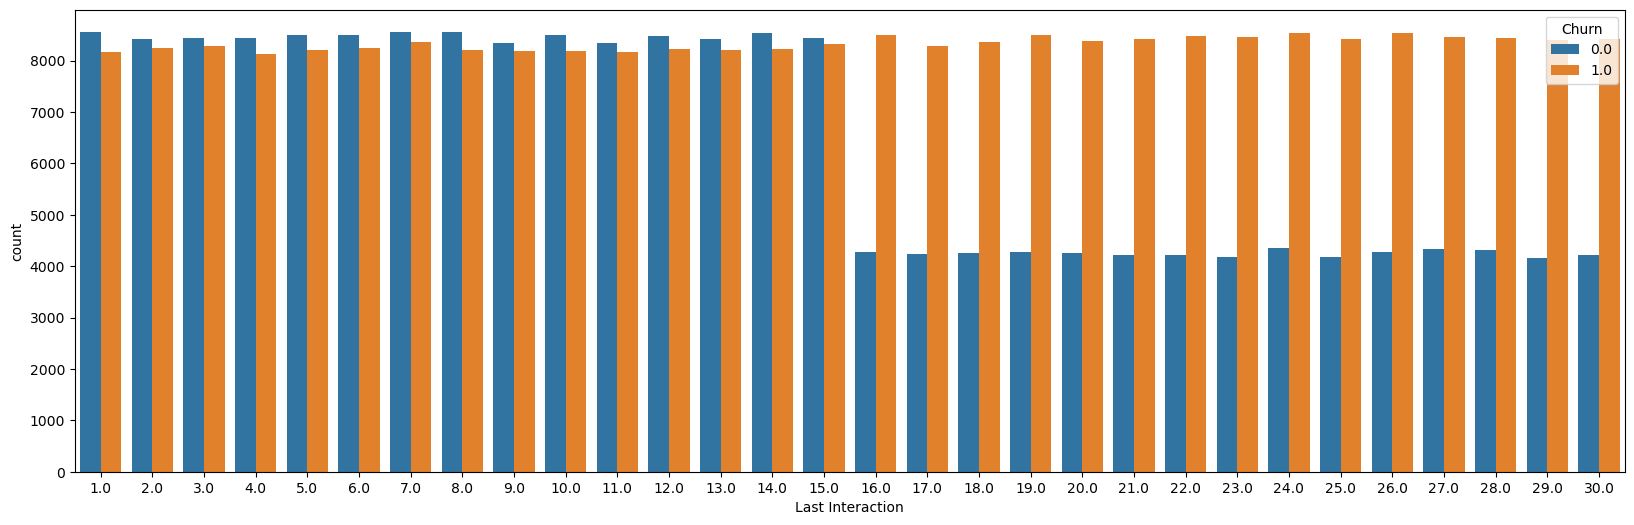

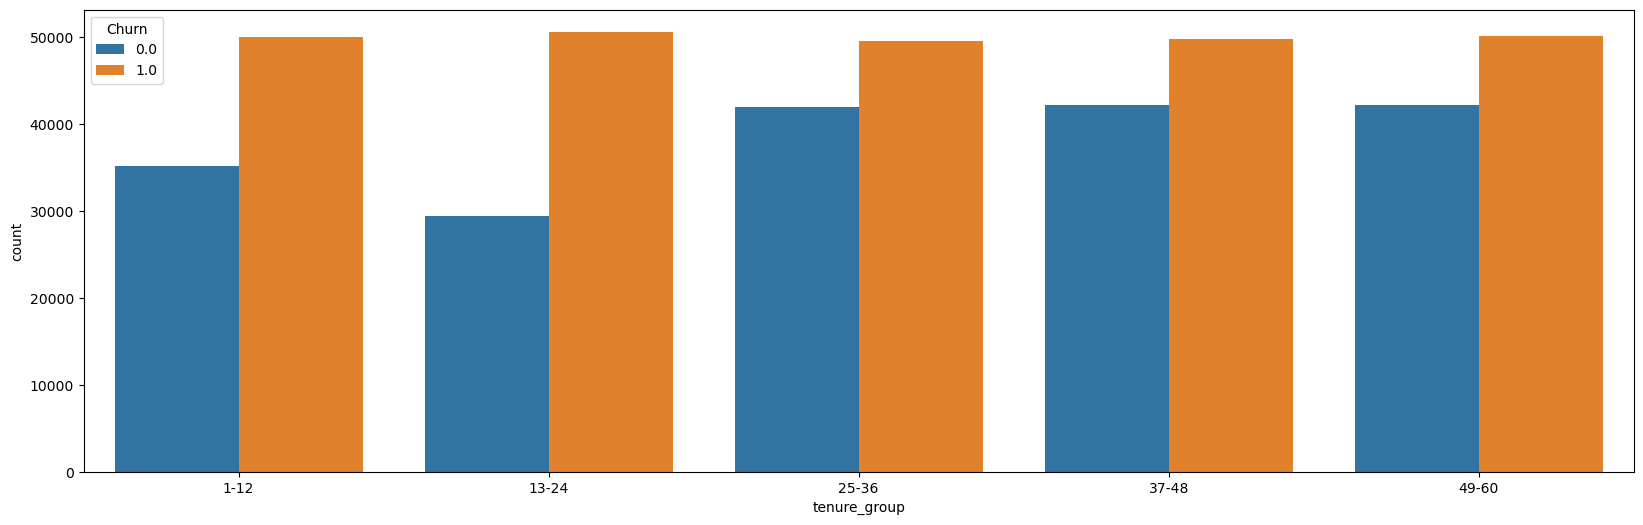

In [34]:
for i, predictor in enumerate(telecom_data2.drop(columns=['Churn','Total Spend'])):
    plt.figure(i,figsize=(20, 6))
    sns.countplot(data=telecom_data2,x=predictor,hue='Churn')

# One-hot encoding the data to convert categorical variables into a numerical format so that machine learning algorithms can understand easily.

In [35]:
#telecom_data2['Churn']=np.where(telecom_data2.Churn=="Yes",1.0)
#telecom_data2['Churn'] = np.where(telecom_data2['Churn'] == 1, 'Yes', 'No')

In [36]:
telecom_dummies=pd.get_dummies(telecom_data2)
telecom_dummies

,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60
0,30.0,14.0,5.0,18.0,932.00,17.0,1.0,1,0,0,0,1,1,0,0,0,0,0,1,0
1,65.0,1.0,10.0,8.0,557.00,6.0,1.0,1,0,1,0,0,0,1,0,0,0,0,0,1
2,55.0,4.0,6.0,18.0,185.00,3.0,1.0,1,0,1,0,0,0,0,1,0,1,0,0,0
3,58.0,21.0,7.0,7.0,396.00,29.0,1.0,0,1,0,0,1,0,1,0,0,0,0,1,0
4,23.0,20.0,5.0,8.0,617.00,20.0,1.0,0,1,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,15.0,1.0,3.0,716.38,8.0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,1
440829,25.0,13.0,1.0,20.0,745.38,2.0,0.0,1,0,0,1,0,1,0,0,1,0,0,0,0
440830,26.0,27.0,1.0,5.0,977.31,9.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0,0
440831,28.0,14.0,2.0,0.0,602.55,2.0,0.0,0,1,0,0,1,0,0,1,0,0,0,0,1


In [37]:
telecom_dummies.head()

,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60
0,30.0,14.0,5.0,18.0,932.0,17.0,1.0,1,0,0,0,1,1,0,0,0,0,0,1,0
1,65.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,1,0,0,0,1,0,0,0,0,0,1
2,55.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,1,0,0,0,0,1,0,1,0,0,0
3,58.0,21.0,7.0,7.0,396.0,29.0,1.0,0,1,0,0,1,0,1,0,0,0,0,1,0
4,23.0,20.0,5.0,8.0,617.0,20.0,1.0,0,1,1,0,0,0,1,0,0,0,1,0,0


In [38]:
telecom_dummies.tail()

,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60
440828,42.0,15.0,1.0,3.0,716.38,8.0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,1
440829,25.0,13.0,1.0,20.0,745.38,2.0,0.0,1,0,0,1,0,1,0,0,1,0,0,0,0
440830,26.0,27.0,1.0,5.0,977.31,9.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0,0
440831,28.0,14.0,2.0,0.0,602.55,2.0,0.0,0,1,0,0,1,0,0,1,0,0,0,0,1
440832,31.0,20.0,1.0,14.0,567.77,21.0,0.0,0,1,0,1,0,0,0,1,0,0,0,1,0


# visualizing the correlation among the different features w.r.t of customer churn

<Axes: >

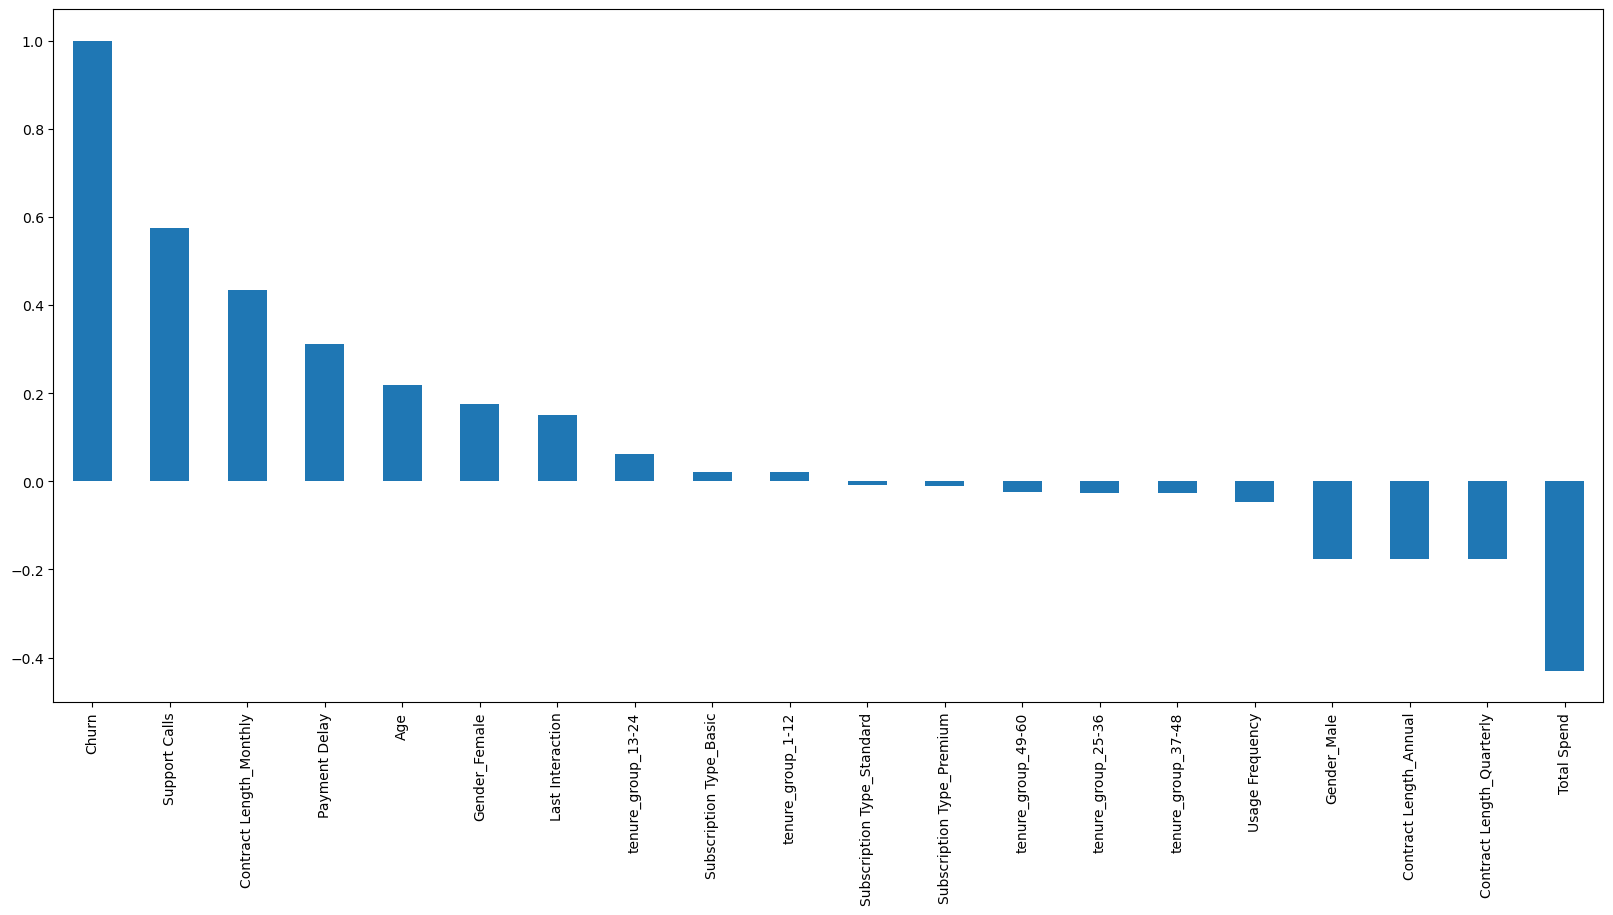

In [39]:
plt.figure(figsize=(20,9))
telecom_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

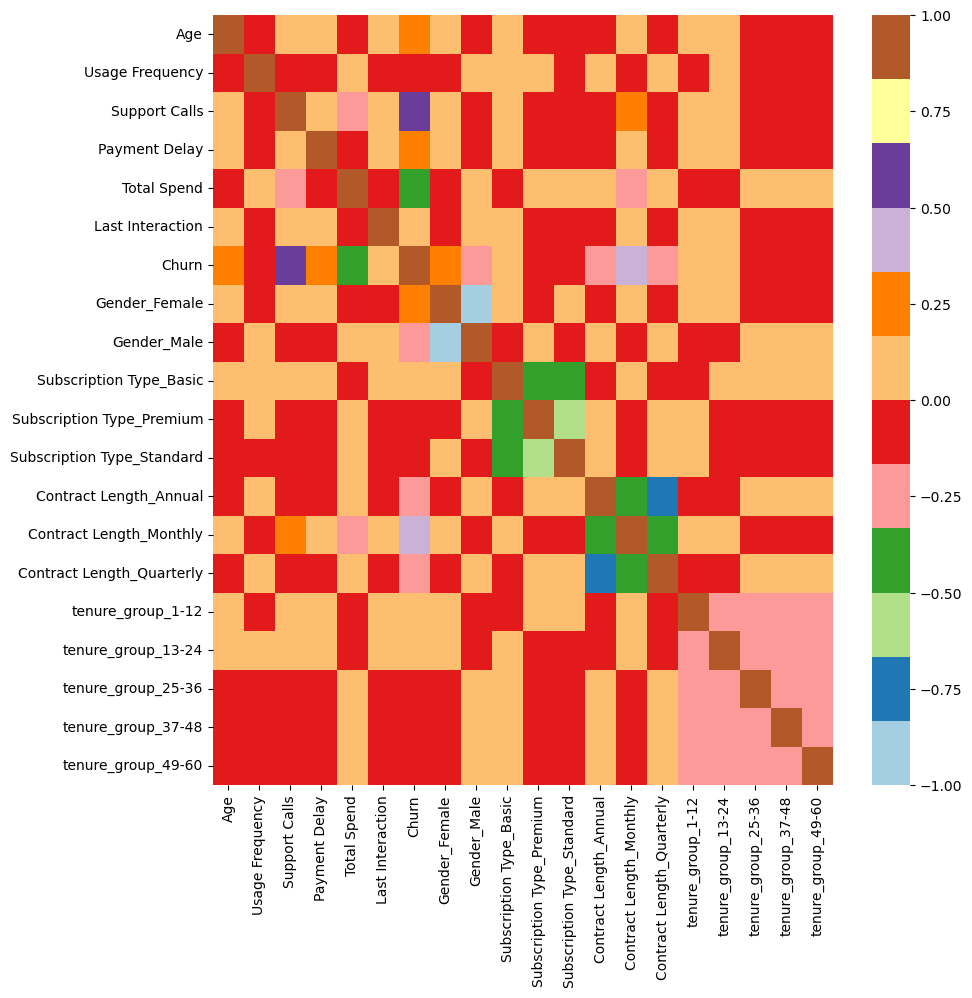

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(telecom_dummies.corr(),cmap='Paired')

In [41]:
new_df_target0=telecom_data2.loc[telecom_data2["Churn"]==0]
new_df_target1=telecom_data2.loc[telecom_data2["Churn"]==1]

In [42]:
def uniplot(df, col, title, hue=None):
    plt.rcParams["axes.labelsize"]=20
    plt.rcParams['axes.titlesize']=22
    plt.rcParams['axes.titlepad']=30
    temp=pd.Series(data=hue)
    fig,ax=plt.subplots()
    width=len(df[col].unique())+4*len(temp.unique())
    fig.set_size_inches(width,5)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue)
    plt.show()

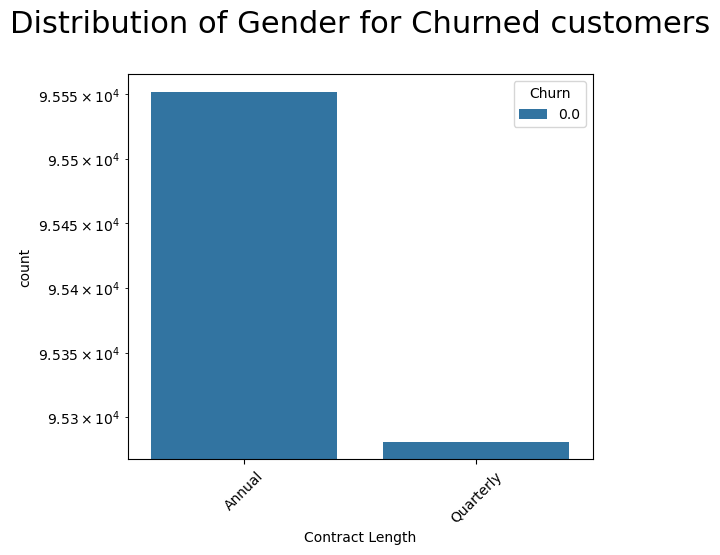

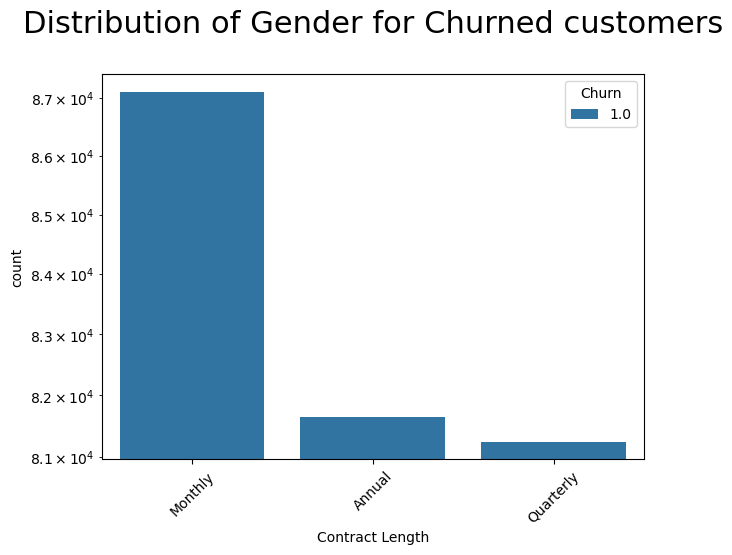

In [43]:
uniplot(new_df_target0,col='Contract Length',title='Distribution of Gender for Churned customers',hue='Churn')
uniplot(new_df_target1,col='Contract Length',title='Distribution of Gender for Churned customers',hue='Churn')

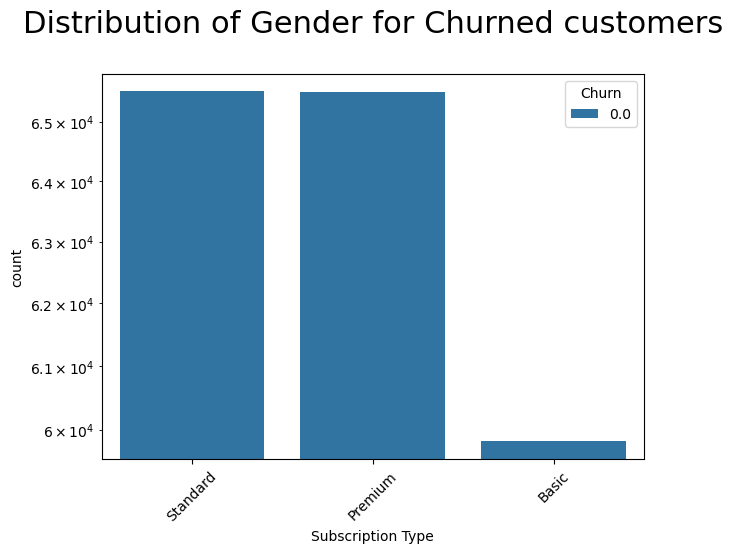

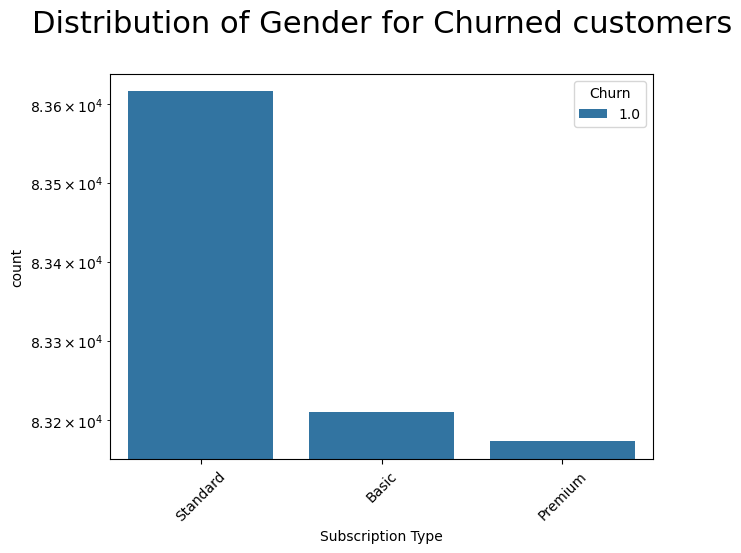

In [44]:
uniplot(new_df_target0,col='Subscription Type',title='Distribution of Gender for Churned customers',hue='Churn')
uniplot(new_df_target1,col='Subscription Type',title='Distribution of Gender for Churned customers',hue='Churn')

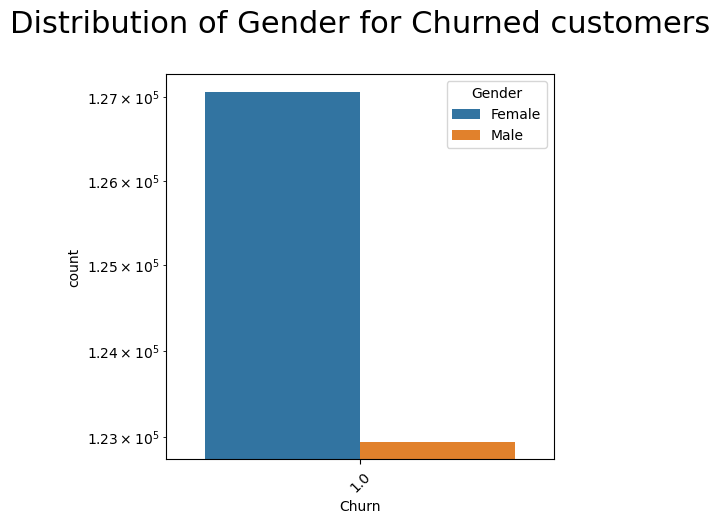

In [45]:
uniplot(new_df_target1,col='Churn',title='Distribution of Gender for Churned customers',hue='Gender')

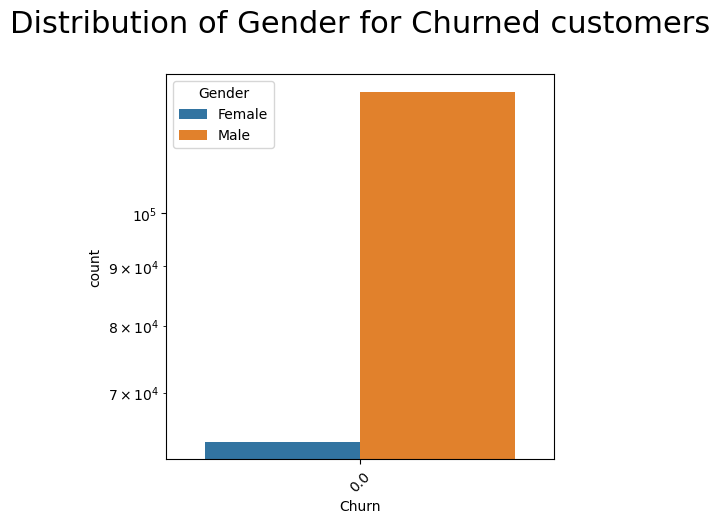

In [46]:
uniplot(new_df_target0,col='Churn',title='Distribution of Gender for Churned customers',hue='Gender')

# storing the data into csv file after convering to numerical values

In [47]:
telecom_dummies.to_csv('telecom.csv')

In [48]:
df=pd.read_csv('telecom.csv')

In [49]:
df

,Unnamed: 0,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,...,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60
0,0,30.0,14.0,5.0,18.0,932.00,17.0,1.0,1,0,...,0,1,1,0,0,0,0,0,1,0
1,1,65.0,1.0,10.0,8.0,557.00,6.0,1.0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2,55.0,4.0,6.0,18.0,185.00,3.0,1.0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,3,58.0,21.0,7.0,7.0,396.00,29.0,1.0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,4,23.0,20.0,5.0,8.0,617.00,20.0,1.0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440827,440828,42.0,15.0,1.0,3.0,716.38,8.0,0.0,0,1,...,1,0,1,0,0,0,0,0,0,1
440828,440829,25.0,13.0,1.0,20.0,745.38,2.0,0.0,1,0,...,1,0,1,0,0,1,0,0,0,0
440829,440830,26.0,27.0,1.0,5.0,977.31,9.0,0.0,0,1,...,0,1,0,0,1,0,0,1,0,0
440830,440831,28.0,14.0,2.0,0.0,602.55,2.0,0.0,0,1,...,0,1,0,0,1,0,0,0,0,1


In [50]:
df.head()

,Unnamed: 0,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,...,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60
0,0,30.0,14.0,5.0,18.0,932.0,17.0,1.0,1,0,...,0,1,1,0,0,0,0,0,1,0
1,1,65.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2,55.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,3,58.0,21.0,7.0,7.0,396.0,29.0,1.0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,4,23.0,20.0,5.0,8.0,617.0,20.0,1.0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [51]:
df.tail()

,Unnamed: 0,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,...,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60
440827,440828,42.0,15.0,1.0,3.0,716.38,8.0,0.0,0,1,...,1,0,1,0,0,0,0,0,0,1
440828,440829,25.0,13.0,1.0,20.0,745.38,2.0,0.0,1,0,...,1,0,1,0,0,1,0,0,0,0
440829,440830,26.0,27.0,1.0,5.0,977.31,9.0,0.0,0,1,...,0,1,0,0,1,0,0,1,0,0
440830,440831,28.0,14.0,2.0,0.0,602.55,2.0,0.0,0,1,...,0,1,0,0,1,0,0,0,0,1
440831,440832,31.0,20.0,1.0,14.0,567.77,21.0,0.0,0,1,...,1,0,0,0,1,0,0,0,1,0


# dividing the input and output variables and their records

In [52]:
x=df.drop('Churn',axis=1)

In [53]:
x

,Unnamed: 0,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60
0,0,30.0,14.0,5.0,18.0,932.00,17.0,1,0,0,0,1,1,0,0,0,0,0,1,0
1,1,65.0,1.0,10.0,8.0,557.00,6.0,1,0,1,0,0,0,1,0,0,0,0,0,1
2,2,55.0,4.0,6.0,18.0,185.00,3.0,1,0,1,0,0,0,0,1,0,1,0,0,0
3,3,58.0,21.0,7.0,7.0,396.00,29.0,0,1,0,0,1,0,1,0,0,0,0,1,0
4,4,23.0,20.0,5.0,8.0,617.00,20.0,0,1,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440827,440828,42.0,15.0,1.0,3.0,716.38,8.0,0,1,0,1,0,1,0,0,0,0,0,0,1
440828,440829,25.0,13.0,1.0,20.0,745.38,2.0,1,0,0,1,0,1,0,0,1,0,0,0,0
440829,440830,26.0,27.0,1.0,5.0,977.31,9.0,0,1,0,0,1,0,0,1,0,0,1,0,0
440830,440831,28.0,14.0,2.0,0.0,602.55,2.0,0,1,0,0,1,0,0,1,0,0,0,0,1


In [54]:
y=df['Churn']

In [55]:
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
440827    0.0
440828    0.0
440829    0.0
440830    0.0
440831    0.0
Name: Churn, Length: 440832, dtype: float64

# Splitting the data into train and test data using train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# building model i.e Decision Tree Classifier

In [57]:
model=DecisionTreeClassifier(criterion='gini',random_state=1000,max_depth=5,min_samples_leaf=8)

# Train the model by using train data

In [58]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, random_state=1000)

# use the model to extract the output for test data

In [59]:
y_predicted=model.predict(x_test)

In [60]:
y_predicted

array([1., 0., 1., ..., 1., 0., 0.])

# finding the metrics to find the performace of algorithms in machine learning

In [61]:
print(classification_report(y_test,y_predicted,labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     37969
           1       0.99      1.00      0.99     50198

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



# finding them using confusion matrix by using confusion_matrix

In [62]:
print(confusion_matrix(y_test,y_predicted))

[[37228   741]
 [    0 50198]]


# building another model i.e Random Forest classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
model_rf=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=1000,max_depth=5,min_samples_leaf=8)
model_rf.fit(x_train,y_train)
y_predicted_rf=model_rf.predict(x_test)

In [65]:
print(classification_report(y_test,y_predicted_rf,labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     37969
           1       0.99      1.00      0.99     50198

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



# saving the model for further use rather develop from scratch

In [66]:
import pickle

In [67]:
filename='model.sav'

In [68]:
pickle.dump(model_rf,open(filename,'wb'))

In [73]:
load_model=pickle.load(open(filename,'rb'))

In [75]:
load_model.score(x_test,y_test)

0.9915954949130628